In [14]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from numpy.typing import NDArray

In [15]:
@jit(nopython=True)
def vizinhos(N: int):
    # Define a tabela de vizinhos
    L = int(np.sqrt(N))
    viz = np.zeros((N, 4), dtype=np.int16)
    for k in range(N):
        viz[k, 0] = k + 1
        if (k + 1) % L == 0:
            viz[k, 0] = k + 1 - L
        viz[k, 1] = k + L
        if k > (N - L - 1):
            viz[k, 1] = k + L - N
        viz[k, 2] = k - 1
        if k % L == 0:
            viz[k, 2] = k + L - 1
        viz[k, 3] = k - L
        if k < L:
            viz[k, 3] = k + N - L
    return viz

In [16]:
@jit(nopython=True)
def algoritmo_de_metropolis(L: int, T: float, iterações: int):
    energias: np.ndarray = np.zeros(iterações)
    magnetização: np.ndarray = np.zeros(iterações)

    spins: np.ndarray = np.array([-1, 1])

    beta = 1 / T
    expoentes: NDArray[np.int_] = [8, 4, 0, -4, -8]
    expoentes = [np.exp(i * beta) for i in expoentes]

    N = L * L
    S = np.random.choice(spins, N)

    viz = vizinhos(N)

    for i in range(iterações):
        copy = np.arange(N)
        np.random.shuffle(copy)
        for k in copy:
            E = 0
            for j in range(N):
                h = S[viz[j][0]] + S[viz[j][1]]
                E = E - S[j] * h
            delta = int(S[k] * np.sum(S[viz[k]]) * 0.5 + 2)
            P = expoentes[delta]
            r = np.random.rand()
            if r < P:
                S[k] = -1 * S[k]
        energias[i] = E
        magnetização[i] = np.sum(S)

    return energias, magnetização

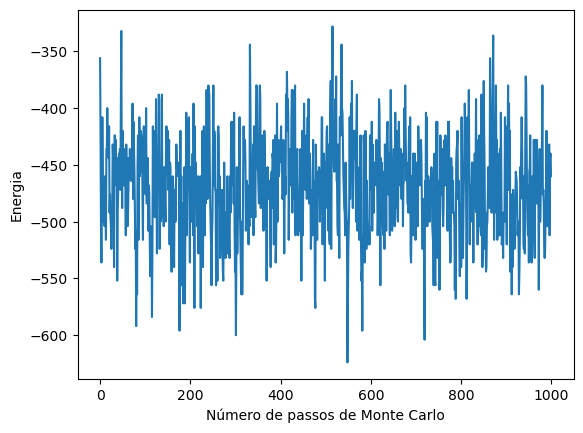

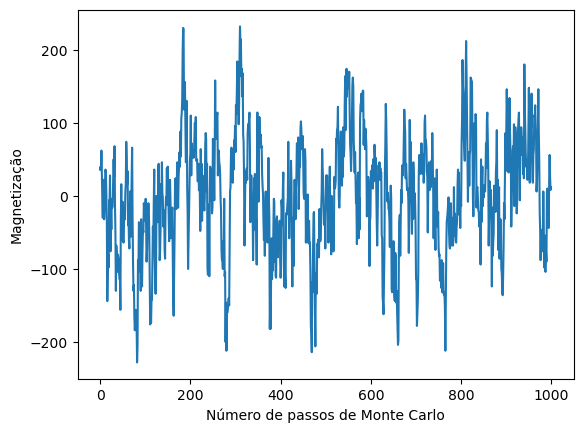

In [17]:
N = 1
iterações = 1000
energias = np.zeros((N, iterações))
magnetizações = np.zeros((N, iterações))

for i in range(N):
    comprimento = 24
    temperature = 3
    energias[i], magnetizações[i] = algoritmo_de_metropolis(
        comprimento, temperature, iterações
    )

for e in energias:
    plt.xlabel("Número de passos de Monte Carlo")
    plt.ylabel("Energia")
    plt.plot(e)

plt.savefig(f"images/energias{comprimento}T{temperature}.png")
plt.show()

for m in magnetizações:
    plt.xlabel("Número de passos de Monte Carlo")
    plt.ylabel("Magnetização")
    plt.plot(m)

plt.savefig(f"images/magnetos{comprimento}T{temperature}.png")
plt.show()

### Análise